In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


class Perceptron(object):
    def __init__(self, epochs):
        self.epochs = epochs
        self.w = np.array([])
        self.iter = 0
        self.mis = 0
        self.x = pd.DataFrame()
        self.y = np.array([])

    def Initialize(self, x, y):
        self.x = x
        self.y = y
        x = np.array(x)
        y = np.array(y)
        self.w = np.zeros(np.size(x, 1)+1)
        t = np.ones((np.size(x, 0), 1))
        x = np.append(x, t, axis=1)
        return x, y

    def predict(self, activation):
        if activation >= 0.0:
            return 1.0
        else:
            return -1.0

    def featureSelect(self, x):
        mask = list(self.x.columns.values)
        x = x.loc[:, mask]
        x = x.to_numpy()
        return x

    def testingMetrics(self, x, printTest=False):
        if printTest is True:
            for i in range(0, np.size(x, 0)):
                y_pred = self.predict(np.dot(x[i, :], np.transpose(self.w)))
                print(str(x[i]) + " " + str(y_pred))
        total = np.size(x, 0)
        accuracy = (total-self.mis)/total
        print("Training accuracy: " + str(accuracy))

    def PerformanceMatrix(self, y_actual, y_pred):
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        for test_instance_result, label in zip(y_pred, y_actual):
            if ((test_instance_result > 0.0) and (label > 0.0)):
                tp += 1
            if ((test_instance_result <= 0.0) and (label <= 0.0)):
                tn += 1
            if ((test_instance_result > 0.0) and (label <= 0.0)):
                fp += 1
            if ((test_instance_result <= 0.0) and (label > 0.0)):
                fn += 1

        accuracy = (tp + tn) / (tp + tn + fp + fn)
        recall = tp / (tp + fn + 0.00001)
        precision = tp / (tp + fp + 0.00001)
        f1 = 2 * (precision * recall) / (precision + recall + 0.00001)
        print("Accuracy:     ", accuracy)
        print("Recall:       ", recall)
        print("Precision:    ", precision)
        print("F1:           ", f1)

    def train(self, x, y):
        x, y = self.Initialize(x, y)
        while(True):
            x, y = shuffle(x, y)
            self.mis = 0
            predictions = []
            for i in range(0, len(y)):
                y_pred = self.predict(np.dot(x[i, :], np.transpose(self.w)))
                if (y[i]*y_pred) <= 0:
                    self.w = self.w + y[i]*x[i, :]
                    self.mis += 1
            self.iter += 1
            predictions.append(y_pred)
            if self.mis == 0:
                print("Success")
                print("Total iterations: " + str(self.iter))
                self.testingMetrics(x)
                break
            if self.iter > self.epochs:
                print("Misclassifications: " + str(self.mis))
                print("Total iterations: " + str(self.iter))
                self.testingMetrics(x)
                break
        return predictions

    def test(self, x, y):
        x = self.featureSelect(x)
        t = np.ones((np.size(x, 0), 1))
        x = np.append(x, t, axis=1)
        predictions = []
        for i in range(0, len(y)):
            y_pred = self.predict(np.dot(x[i, :], np.transpose(self.w)))
            predictions.append(y_pred)
        self.PerformanceMatrix(y, predictions)
        return np.array(predictions)


def readfile(filename):
    x = []
    y = []
    data = open(filename)
    for index, line in enumerate(data):
        line = line.split(None, 1)
        if len(line) == 1:
            line += ['']
        label, features = line
        y.append(float(label))
        temp_x = {}
        for elem in features.split(None):
            name, value = elem.split(':')
            temp_x[int(name)] = (float(value))
        x = x + [temp_x]
    x = pd.DataFrame(x).fillna(-1)
    return x, y


def calculate_accuracy(y_test, y_pred):
    mis = 0
    for Y, Y_pred in zip(y_test, y_pred):
        if(Y != Y_pred):
            mis += 1
    accuracy = (float(len(y_test)) - mis)/float(len(y_test))
    print("\nFinal accuracy: " + str(accuracy))
    print("Total misclassifications: " + str(mis) +
          " (Out of " + str(len(y_test)) + ")")


# Binary Classification

x, y = readfile('Dataset/a4a.txt')
inference = Perceptron(epochs=128)
y_pred_train = inference.train(x, y)
print("\nTesting...")
x_test, y_test = readfile('Dataset/a4a_t.txt')
t_pred_test = inference.test(x_test, y_test)


# Multiclass Classification

# x, y = readfile('Dataset/iris.txt')
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y,
#     test_size=0.50, random_state=42
# )

# y_train_1 = np.array(y_train)
# y_train_2 = np.array(y_train)
# y_test_1 = np.array(y_test)
# y_test_2 = np.array(y_test)

# y_train_1[y_train_1 >= 2.0] = -1.0
# y_train_2[y_train_2 != 3.0] = -1.0
# y_train_2[y_train_2 == 3.0] = 1.0

# y_test_1[y_test_1 >= 2.0] = -1.0
# y_test_2[y_test_2 != 3.0] = -1.0
# y_test_2[y_test_2 == 3.0] = 1.0

# classifier1 = Perceptron(epochs=128)
# classifier2 = Perceptron(epochs=128)
# print("\nTraining classifier 1")
# y_pred_train_1 = classifier1.train(x_train, y_train_1)
# print("\nTraining classifier 2")
# y_pred_train_2 = classifier2.train(x_train, y_train_2)
# print("\nTesting...")
# print("\nTesting classifier 1")
# y_pred_test_1 = classifier1.test(x_test, y_test_1)
# print("\nTesting classifier 2")
# y_pred_test_2 = classifier2.test(x_test, y_test_2)

# y_pred = []
# for clf1, clf2 in zip(y_pred_test_1, y_pred_test_2):
#     if (clf1 == 1):
#         y_pred.append(1.0)
#     elif (clf2 == 1):
#         y_pred.append(3.0)
#     else:
#         y_pred.append(2.0)

# calculate_accuracy(y_test, y_pred)


Misclassifications: 979
Total iterations: 129
Training accuracy: 0.7952311231959841

Testing...
Accuracy:      0.7588912886969043
Recall:        0.8796031852102764
Precision:     0.4980849429755001
F1:            0.6360132069330221


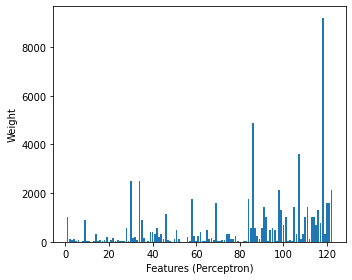

In [3]:
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()
import math

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 1
y_index = 2
index = x.columns

plt.figure(figsize=(5, 4))
plt.bar(index , inference.w[:len(inference.w) - 1]**2)
plt.xlabel("Features (Perceptron)")
plt.ylabel("Weight")

plt.tight_layout()
plt.show()

# plt.figure(figsize=(5, 4))
# plt.bar(index , classifier2.w[:len(classifier2.w) - 1]**2)
# plt.xlabel("Features (Perceptron)")
# plt.ylabel("Weight")

# plt.tight_layout()
# plt.show()



In [4]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


class LinearSVM(object):
    def __init__(self, epochs):
        self.x = pd.DataFrame()
        self.y = np.array([])
        self.weights = np.array([])
        self.epochs = epochs
        self.reg_strength = 10
        self.learning_rate = 0.001
        self.lamda = 1

    def hingeloss(self, d, n):
        return self.reg_strength*(np.sum(d)/n)

    def get_cost(self, w, x, y):
        n = x.shape[0]
        dist = 1 - y*(np.dot(x, w))
        dist[dist < 0] = 0
        cost = (self.lamda/2)*(np.dot(w, w)) + self.hingeloss(dist, n)
        return cost

    def get_cost_gradient(self, W, X_batch, Y_batch):
        dist = 1 - (Y_batch * np.dot(X_batch, W))
        dw = np.zeros(len(W))
        if max(0, dist) == 0:
            di = W
        else:
            di = W - (self.reg_strength * Y_batch * X_batch)
            dw += di
        return dw

    def initialize(self, x, y):
        self.x = x
        self.y = y
        y = np.array(y)
        x = np.array(x)
        t = np.ones((np.size(x, 0), 1))
        x = np.append(x, t, axis=1)
        print(x.shape)
        self.weights = np.zeros(np.size(x, 1))
        print(self.weights.shape)
        return x, y

    def sgd(self, features, outputs):
        max_epochs = self.epochs
        prev_cost = float("inf")
        cost_threshold = 0.001

        for epoch in range(1, max_epochs):
            X, Y = shuffle(features, outputs)
            for index, x in enumerate(X):
                gradient = self.get_cost_gradient(self.weights, x, Y[index])
                self.weights = self.weights - (self.learning_rate * gradient)
           
            if(epoch%3 == 0):           
                cost = self.get_cost(self.weights, features, outputs)
                print("Iteration: " + str(epoch) + "\tcost: " + str(cost))
                if abs(prev_cost - cost) < cost_threshold * prev_cost:
                    break
                prev_cost = cost

    def train(self, x, y):
        x, y = self.initialize(x, y)
        print("training started...")
        self.sgd(x, y)
        print("training finished\n")
        y_pred = np.sign(np.dot(x, self.weights))
        self.PerformanceMatrix(x, y, y_pred)
        return y_pred

    def test(self, x, y):
        x = self.featureSelect(x)
        y = np.array(y)
        x = np.array(x)
        t = np.ones((np.size(x, 0), 1))
        x = np.append(x, t, axis=1)
        y_pred = np.sign(np.dot(x, self.weights))
        self.PerformanceMatrix(x, y, y_pred)
        return y_pred

    def featureSelect(self, x):
        mask = list(self.x.columns.values)
        x = x.loc[:, mask]
        x = x.to_numpy()
        return x

    def PerformanceMatrix(self, X, y_actual, y_pred):
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        for test_instance_result, label in zip(y_pred, y_actual):
            if ((test_instance_result > 0.0) and (label > 0.0)):
                tp += 1
            if ((test_instance_result <= 0.0) and (label <= 0.0)):
                tn += 1
            if ((test_instance_result > 0.0) and (label <= 0.0)):
                fp += 1
            if ((test_instance_result <= 0.0) and (label > 0.0)):
                fn += 1

        accuracy = (tp + tn) / (tp + tn + fp + fn)
        recall = tp / (tp + fn + 0.00001)
        precision = tp / (tp + fp + 0.00001)
        f1 = 2 * (precision * recall) / (precision + recall + 0.00001)
        print("Accuracy:     ", accuracy)
        print("Recall:       ", recall)
        print("Precision:    ", precision)
        print("F1:           ", f1)


def readfile(filename):
    x = []
    y = []
    data = open(filename)
    for index, line in enumerate(data):
        line = line.split(None, 1)
        if len(line) == 1:
            line += ['']
        label, features = line
        y.append(float(label))
        temp_x = {}
        for elem in features.split(None):
            name, value = elem.split(':')
            temp_x[int(name)] = (float(value))
        x = x + [temp_x]
    x = pd.DataFrame(x).fillna(-1)
    return x, y

def calculate_accuracy(y_test, y_pred):
    mis = 0
    for Y, Y_pred in zip(y_test, y_pred):
        if(Y != Y_pred):
            mis += 1
    accuracy = (float(len(y_test)) - mis)/float(len(y_test))
    print("\nFinal accuracy: " + str(accuracy))
    print("Total misclassifications: " + str(mis) +
          " (Out of " + str(len(y_test)) + ")")

# Binary Classification

x, y = readfile('Dataset/a4a.txt')
inference = LinearSVM(epochs=128)
y_pred_train = inference.train(x, y)
print("\nTesting...")
x_test, y_test = readfile('Dataset/a4a_t.txt')
t_pred_test = inference.test(x_test, y_test)

# Multiclass Classification

# x, y = readfile('Dataset/iris.txt')
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y,
#     test_size=0.50, random_state=42
# )

# y_train_1 = np.array(y_train)
# y_train_2 = np.array(y_train)
# y_test_1 = np.array(y_test)
# y_test_2 = np.array(y_test)

# y_train_1[y_train_1 >= 2.0] = -1.0
# y_train_2[y_train_2 != 3.0] = -1.0
# y_train_2[y_train_2 == 3.0] = 1.0

# y_test_1[y_test_1 >= 2.0] = -1.0
# y_test_2[y_test_2 != 3.0] = -1.0
# y_test_2[y_test_2 == 3.0] = 1.0

# classifier1 = LinearSVM(epochs=128)
# classifier2 = LinearSVM(epochs=128)
# print("\nTraining classifier 1")
# y_pred_train_1 = classifier1.train(x_train, y_train_1)
# print("\nTraining classifier 2")
# y_pred_train_2 = classifier2.train(x_train, y_train_2)
# print("\nTesting...")
# print("\nTesting classifier 1")
# y_pred_test_1 = classifier1.test(x_test, y_test_1)
# print("\nTesting classifier 2")
# y_pred_test_2 = classifier2.test(x_test, y_test_2)

# y_pred = []
# for clf1, clf2 in zip(y_pred_test_1, y_pred_test_2):
#     if (clf1 == 1):
#         y_pred.append(1.0)
#     elif (clf2 == 1):
#         y_pred.append(3.0)
#     else:
#         y_pred.append(2.0)

# calculate_accuracy(y_test, y_pred)


(4781, 122)
(122,)
training started...
Iteration: 3	cost: 5.781501409287979
Iteration: 6	cost: 6.061286211890953
Iteration: 9	cost: 5.387365681140744
Iteration: 12	cost: 5.42056093447742
Iteration: 15	cost: 4.928950019216752
Iteration: 18	cost: 5.479216137707176
Iteration: 21	cost: 5.865068929808519
Iteration: 24	cost: 6.097622607960589
Iteration: 27	cost: 5.0825381123671916
Iteration: 30	cost: 4.769576282197388
Iteration: 33	cost: 5.070909522030606
Iteration: 36	cost: 6.331399557307058
Iteration: 39	cost: 5.90646632124106
Iteration: 42	cost: 4.858576883531324
Iteration: 45	cost: 5.916999031359021
Iteration: 48	cost: 10.032603342984286
Iteration: 51	cost: 5.306695922348226
Iteration: 54	cost: 4.9165712687560506
Iteration: 57	cost: 6.715991246156546
Iteration: 60	cost: 5.220174245334105
Iteration: 63	cost: 5.783435959688689
Iteration: 66	cost: 5.987880960964811
Iteration: 69	cost: 5.850305538529588
Iteration: 72	cost: 5.107945144870713
Iteration: 75	cost: 7.233222021744086
Iteration: 78

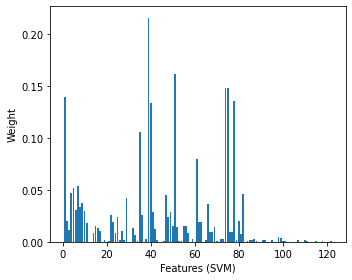

In [5]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 1
y_index = 2
index = x.columns

plt.figure(figsize=(5, 4))
plt.bar(index , inference.weights[:len(inference.weights) - 1]**2)
plt.xlabel("Features (SVM)")
plt.ylabel("Weight")

plt.tight_layout()
plt.show()

# plt.figure(figsize=(5, 4))
# plt.bar(index , classifier2.weights[:len(classifier2.weights) - 1]**2)
# plt.xlabel("Features (SVM)")
# plt.ylabel("Weight")

# plt.tight_layout()
# plt.show()


In [8]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

class leaf:
    def __init__(self, data):
        self.y_pred = count_classes(data)


class node:
    def __init__(self, question, right_node, left_node):
        self.question = question
        self.right_node = right_node
        self.left_node = left_node


class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, instance):
        val = instance[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value


featureGain = {}

def readfile(filename):
    x = []
    y = []
    data = open(filename)
    for i, line in enumerate(data):
        line = line.split(None, 1)
        if len(line) == 1:
            line += ['']
        label, features = line
        y.append(float(label))
        temp_x = {}
        for elem in features.split(None):
            name, value = elem.split(':')
            temp_x[int(name)] = (float(value))
        x = x + [temp_x]
    return x, y

def count_classes(rows):
    counts = {}
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

def split_data(rows, question):
    true_rows = []
    false_rows = []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

def entropy(rows):
    counts = count_classes(rows)
    entropy = 0
    for classes in counts:
        prob = counts[classes] / float(len(rows))
        entropy += -prob*math.log(prob)
    return entropy

def infoGain(right, left, current_uncertainty):
    p = 1.0*(len(right)) / (len(left) + len(right))
    return current_uncertainty - p * entropy(right) - (1 - p) * entropy(left)

def find_best_split(rows):
    best_gain = 0
    best_question = None
    total_entropy = entropy(rows)
    features = len(rows[0]) - 1

    for col in range(features):
        values = set([row[col] for row in rows])
        for elem in values:
            question = Question(col, elem)
            right, left = split_data(rows, question)
            gain = infoGain(right, left, total_entropy)
            if gain >= best_gain:
                best_gain, best_question = gain, question
    
    return best_gain, best_question

def grow_tree(rows):
    gain, question = find_best_split(rows)
    featureGain.update({str(question.column): gain})

    if gain == 0:
        return leaf(rows)

    true_rows, false_rows = split_data(rows, question)
    true_branch = grow_tree(true_rows)
    false_branch = grow_tree(false_rows)

    return node(question, true_branch, false_branch)

def predict(row, tree):
    if isinstance(tree, leaf):
        return tree.y_pred

    if tree.question.match(row):
        return predict(row, tree.right_node)
    else:
        return predict(row, tree.left_node)

def output_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for label in counts.keys():
        probs[label] = str(int(counts[label] / total)) 
    return probs

def featureSelect(X, x):
    mask = list(X.columns.values)
    x = x.loc[:, mask]
    return x

# Binary Classification

train_data, y_train = readfile('Dataset/a4a.txt')
train_data = pd.DataFrame(train_data).fillna(-1)
train_data = train_data.assign(label=y_train)
training_data = train_data.values.tolist()

print("Building the tree")
my_tree = grow_tree(training_data)
print("Done")

testing_data, y_test = readfile('Dataset/a4a_t.txt')
testing_data = pd.DataFrame(testing_data).fillna(-1)
testing_data = featureSelect(train_data, testing_data)
testing_data = testing_data.assign(label=y_test)
testing_data = testing_data.values.tolist()

# Multiclass Classification

# x, y = readfile('Dataset/iris.txt')
# x = pd.DataFrame(x).fillna(-1)
# x = x.assign(label=y)
# x = x.values.tolist()

# training_data, testing_data, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# print("Building the tree")
# my_tree = grow_tree(training_data)
# print("Done")

y_pred = []
for row in testing_data:
    Y = (output_leaf(predict(row, my_tree)))
    for key, value in Y.items():
        y_pred.append(float(key))
y_pred = np.array(y_pred)

mis = 0
for Y, Y_pred in zip(y_test, y_pred):
    if(Y != Y_pred):
        mis += 1
accuracy = (float(len(y_test)) - mis)/float(len(y_test))
print("\nFinal accuracy: " + str(accuracy))
print("Total misclassifications: " + str(mis))
# featureGain = sorted(featureGain.items(), key=operator.itemgetter(1), reverse=True)


Building the tree
Done

Final accuracy: 0.6237580993520518
Total misclassifications: 10452


In [10]:
sorted(featureGain.items(), key=operator.itemgetter(1), reverse=True)

[('53', 0.6931471805599453),
 ('58', 0.6931471805599453),
 ('84', 0.6931471805599453),
 ('24', 0.6931471805599453),
 ('62', 0.6931471805599453),
 ('8', 0.6730116670092565),
 ('85', 0.6365141682948128),
 ('47', 0.6365141682948128),
 ('60', 0.6365141682948128),
 ('59', 0.5623351446188083),
 ('15', 0.5623351446188083),
 ('40', 0.34883209584303193),
 ('93', 0.3250829733914482),
 ('69', 0.31753480962605024),
 ('82', 0.22314355131420988),
 ('33', 0.22314355131420988),
 ('27', 0.22314355131420976),
 ('26', 0.22208579285422086),
 ('45', 0.22208579285422086),
 ('22', 0.21951214867965618),
 ('49', 0.2157615543388357),
 ('32', 0.21576155433883565),
 ('30', 0.19479938905193295),
 ('55', 0.19479938905193295),
 ('76', 0.15829761474955378),
 ('99', 0.13666070641142763),
 ('74', 0.13412872290300448),
 ('87', 0.1332291895216587),
 ('46', 0.1277074409824574),
 ('38', 0.12453834551117982),
 ('63', 0.11849392256130031),
 ('5', 0.11436404507122089),
 ('17', 0.11039215951242132),
 ('18', 0.10710036462763461